In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
from typing import Tuple, Dict, List, Set, Optional, Any
load_dotenv()

True

In [2]:
root = "./excel/data.xlsx"

### Getting all data

In [4]:
users_df = pd.read_excel(root, sheet_name="users")
clients_df = pd.read_excel(root, sheet_name="clients")
client_equipment_df = pd.read_excel(root, sheet_name="client_equipment")
failure_types_df = pd.read_excel(root, sheet_name="failure_types")
equipment_failures_df = pd.read_excel(root, sheet_name="equipment_failures")
maintenance_types_df = pd.read_excel(root, sheet_name="maintenance_types")
maintenance_order_df = pd.read_excel(root, sheet_name="maintenance_order")
inspections_df = pd.read_excel(root, sheet_name="inspections")

### Users Details

In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           22 non-null     object 
 1   first_name   22 non-null     object 
 2   last_name    22 non-null     object 
 3   email        22 non-null     object 
 4   phone        22 non-null     object 
 5   gender       22 non-null     object 
 6   address      22 non-null     object 
 7   password     22 non-null     object 
 8   role         22 non-null     object 
 9   hourly_rate  22 non-null     float64
 10  is_active    22 non-null     bool   
 11  created_at   22 non-null     object 
 12  updated_at   22 non-null     object 
dtypes: bool(1), float64(1), object(11)
memory usage: 2.2+ KB


1. Counts Users by role

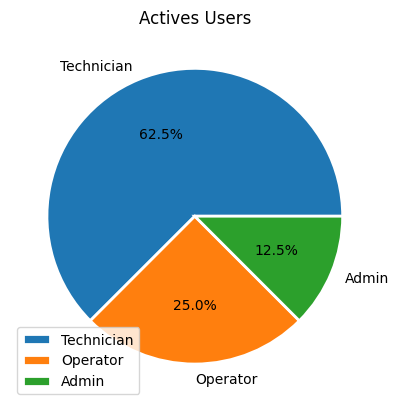

In [6]:
active_users = users_df["is_active"] == True #Filter active users
roles_counts = users_df.loc[active_users]["role"].value_counts().reset_index()
roles_counts.columns = ["Role", "Count"]
percent = [f"{x:.2f} %" for x in ((roles_counts["Count"] / roles_counts["Count"].sum())*100)]

users_by_roles = pd.DataFrame({
    "Roles": roles_counts["Role"],
    "Counts": roles_counts["Count"],
    "Percentage": percent
})
#Data
x: Any = users_by_roles["Roles"]
y = users_by_roles["Counts"]

#Pies charts
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct='%1.1f%%', wedgeprops={"linewidth":2,"edgecolor": "white"})
ax.legend()
plt.title('Actives Users')
plt.show()

### Clients Details

In [7]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           45 non-null     object
 1   first_name   45 non-null     object
 2   last_name    45 non-null     object
 3   email        45 non-null     object
 4   phone        45 non-null     object
 5   gender       45 non-null     object
 6   address      45 non-null     object
 7   client_type  45 non-null     object
 8   created_at   45 non-null     object
 9   updated_at   45 non-null     object
dtypes: object(10)
memory usage: 3.6+ KB


1. Counts Clients

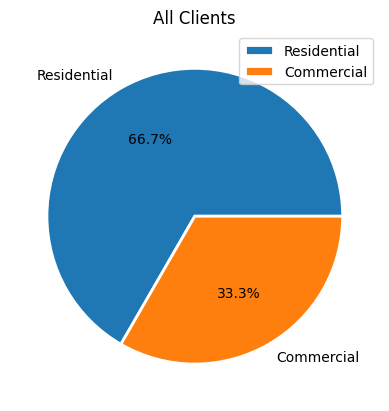

In [8]:
client_counts = clients_df["client_type"].value_counts().reset_index()
client_counts.columns = ["Type_of_Clients", "Count"]
percent_clients = [f"{x:.2f} %" for x in ((client_counts["Count"] / client_counts["Count"].sum())* 100)]

clients_by_type = pd.DataFrame({
    "Type_of_Clients": client_counts["Type_of_Clients"],
    "Counts": client_counts["Count"],
    "Percentage": percent_clients
})
#Data
x: Any = clients_by_type["Type_of_Clients"]
y = clients_by_type["Counts"]

#Pies charts
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct='%1.1f%%', wedgeprops={"linewidth":2,"edgecolor": "white"})
ax.legend()
plt.title('All Clients')
plt.show()

## Some Analysis

1. Question: List the first names, last names, and email addresses of all clients whose client_type is 'Commercial'.

In [9]:
commercial_clients = clients_df["client_type"] == "Commercial"
clients_df.loc[commercial_clients, ["first_name","last_name","email"]]

,first_name,last_name,email
30,Empresa,Venezolana S.A.,empresavenezolana31@gmail.com
31,Comercial,Maracaibo C.A.,comercialmaracaibo32@hotmail.com
32,Industrias,Valencia Ltda.,industriasvalencia33@outlook.com
33,Servicios,Lara S.R.L.,servicioslara34@gmail.com
34,Constructora,Aragua C.A.,constructoraaragua35@hotmail.com
35,Exportadora,Anzoátegui S.A.,exportadoraanzoategui36@outlook.com
36,Minería,Bolívar C.A.,mineriabolivar37@gmail.com
37,Agroindustrial,Monagas S.R.L.,agroindustrialmonagas38@hotmail.com
38,Tecnología,Táchira Ltda.,tecnologiatachira39@outlook.com
39,Pesquera,Sucre C.A.,pesquerasucre40@gmail.com


2. In the users sheet, create a new column full_name by concatenating first_name and last_name with a space in between.

In [11]:
users_df["full_name"] = users_df["first_name"] + " " + users_df["last_name"]
full_users = users_df[["first_name","last_name","full_name"]]

full_users.columns = [ x[0].upper() + x[1:len(x)] for x in full_users.columns]
full_users.head(10)

,First_name,Last_name,Full_name
0,Juan,Pérez,Juan Pérez
1,María,González,María González
2,Carlos,Rodríguez,Carlos Rodríguez
3,José,López,José López
4,Luis,Martínez,Luis Martínez
5,Pedro,García,Pedro García
6,Miguel,Hernández,Miguel Hernández
7,Antonio,Díaz,Antonio Díaz
8,Francisco,Silva,Francisco Silva
9,Rafael,Rojas,Rafael Rojas


3. Basic Grouping & Aggregation: Using the users sheet, calculate the average hourly_rate for each distinct role (Admin, Technician, Operator).

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17232\2281071632.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


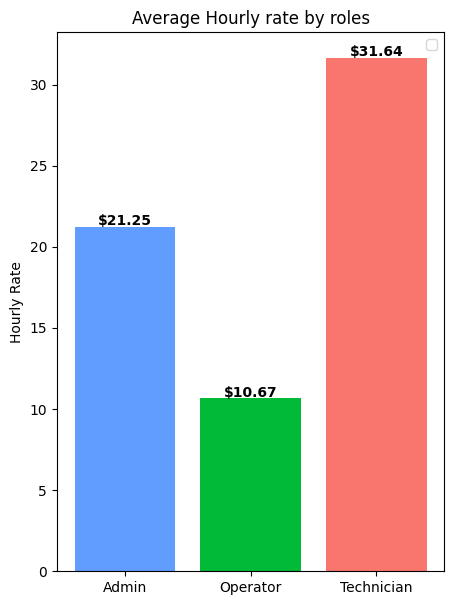

In [12]:
avg_user = users_df.groupby("role")["hourly_rate"].mean()
users_hourly_rate = pd.DataFrame({
    "Role": avg_user.index,
    "Average_hourly": avg_user.values
})
users_hourly_rate # type:ignore

#Bar Chart
fig, ax = plt.subplots(figsize=(5, 7))
x = users_hourly_rate["Role"]
y = users_hourly_rate["Average_hourly"]
colors = ["#619cff", "#00ba38", "#f8766d"]

# Add value labels on bars
for i, total in enumerate(y):
    plt.text(i, total + 0.1, f'${total:.2f}', ha='center', weight='bold', color='black')

ax.bar(x, y, color = colors)
ax.legend()
ax.set_ylabel("Hourly Rate")
plt.title("Average Hourly rate by roles")
plt.show()

4. Simple Counting & Value Counts: In the clients sheet, count how many clients are of each gender. Display the counts and the percentages.

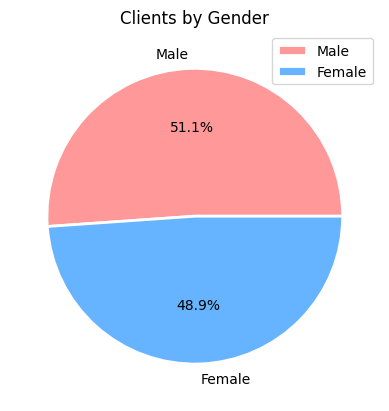

In [13]:
clients_gender = clients_df["gender"].value_counts().reset_index()
clients_gender.columns = ["Gender", "Counts"]
percent_CG = [f"{x:.2f} %" for x in ((clients_gender["Counts"] / clients_gender["Counts"].sum())* 100)]


clients_by_gender = pd.DataFrame({
    "Gender": clients_gender["Gender"],
    "Counts": clients_gender["Counts"],
    "Percentage": percent_CG
})

# Data visualization
x = clients_by_gender["Gender"]
y = clients_by_gender["Counts"]
colors = ["#ff9999","#66b3ff"]

#Pies charts
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct='%1.1f%%', wedgeprops={"linewidth":2,"edgecolor": "white"}, colors = colors)
ax.legend()
plt.title('Clients by Gender')
plt.show()


5. Data Cleaning - Handling Missing Values: Check all sheets for any missing values. Print a summary showing the count of missing values per column for each sheet. (Assume blank cells as missing).

In [15]:
sheets = pd.ExcelFile(root).sheet_names

def show_files(sheets_list):
    show_sheet = []
    
    for sheet_name in sheets_list:
        result = pd.read_excel(root, sheet_name=sheet_name).isna().sum()
        missing_values = pd.DataFrame({
            "Sheet": sheet_name,
            "Column": result.index,
            "Missing_values": result.values
        })
        show_sheet.append(missing_values)

    combined_df = pd.concat(show_sheet, ignore_index=True)
    missing_values = combined_df[combined_df["Missing_values"] > 0]
    missing_values = missing_values.sort_values(["Sheet","Missing_values"], ascending=[True, False])
    return missing_values
    
show_files(sheets)

,Sheet,Column,Missing_values
91,inspections,converted_to_maintenance_order_id,12
87,inspections,amps_reading,6
84,inspections,pressure_suction,2
71,maintenance_order,next_maintenance_date,40
63,maintenance_order,completed_date,30
65,maintenance_order,customer_feedback,30
66,maintenance_order,customer_rating,30
64,maintenance_order,technician_notes,14
77,maintenance_types,frequency_days,5


sheets = pd.ExcelFile(root).sheet_names

def show_files(x):
    result = pd.read_excel(root, sheet_name=x).isna().sum()
    print(f"""
    Sheet Name: {x}
    Missing Values: {result}
""")
    
result = [ show_files(x) for x in sheets ]
result

7. Merging DataFrames (Simple Join): Merge the maintenance_order sheet with the clients sheet on client_id to create a DataFrame that shows each maintenance order alongside the client's first and last name.

In [16]:
merged_Client_MO_df = pd.merge( maintenance_order_df, clients_df, left_on="client_id",right_on="id", how="inner")
merged_Client_MO_df.rename(columns={"id_x":"Maintenance_order_id"},inplace=True)
merged_Client_MO_df["Full_name"] = merged_Client_MO_df["first_name"] + " " + merged_Client_MO_df["last_name"]
merged_Client_MO_df[["Maintenance_order_id","Full_name"]].head(10)

,Maintenance_order_id,Full_name
0,MO-001,Juan Pérez
1,MO-002,María González
2,MO-003,Carlos Rodríguez
3,MO-004,Ana López
4,MO-005,José Martínez
5,MO-006,Carmen García
6,MO-007,Luis Hernández
7,MO-008,Isabel Sánchez
8,MO-009,Miguel Ramírez
9,MO-010,Patricia Torres


## Merge

In [17]:
merged_Client_MO_df = pd.merge(clients_df, maintenance_order_df, left_on="id",right_on="client_id", how="inner")
merge_result = pd.merge(merged_Client_MO_df, users_df, left_on="user_id", right_on="id", how="inner")
merge_result["Technician_name"] = merge_result["full_name"]
merge_result[["client_id","phone_x","client_type","equipment_id","status","Technician_name", "technician_notes",]].head(10)

,client_id,phone_x,client_type,equipment_id,status,Technician_name,technician_notes
0,CLIENT-0001-A,+58-401-123-4567,Residential,EQ-001,completed,Carlos Rodríguez,"Replaced air filter, checked system efficiency..."
1,CLIENT-0001-A,+58-401-123-4567,Residential,EQ-002,completed,Rafael Rojas,"Coil cleaning completed, improved efficiency."
2,CLIENT-0002-B,+58-402-234-5678,Residential,EQ-003,completed,José López,"Repaired compressor, replaced faulty capacitor..."
3,CLIENT-0002-B,+58-402-234-5678,Residential,EQ-003,completed,Andrés Martínez,"Follow-up compressor check, all good."
4,CLIENT-0003-C,+58-403-345-6789,Residential,EQ-004,completed,Pedro García,"Performed vibration analysis on motor, no issu..."
5,CLIENT-0003-C,+58-403-345-6789,Residential,EQ-004,completed,Manuel Rodríguez,"Routine vibration analysis, no issues."
6,CLIENT-0004-D,+58-404-456-7890,Residential,EQ-005,scheduled,Miguel Hernández,NaN
7,CLIENT-0004-D,+58-404-456-7890,Residential,EQ-005,completed,Ricardo López,"Lubrication performed, system maintenance comp..."
8,CLIENT-0005-E,+58-405-567-8901,Residential,EQ-006,in_progress,Francisco Silva,"Initial inspection shows refrigerant leak, ord..."
9,CLIENT-0005-E,+58-405-567-8901,Residential,EQ-007,completed,Sergio Hernández,"Refrigerant leak repaired, system recharged an..."
